In [2]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# Loading the datasets
train = fetch_20newsgroups(subset='train', shuffle=True)
test = fetch_20newsgroups(subset='test', shuffle=True)

# Categories
categories = train.target_names

# Train dataset, casting to numpy array
train_data = np.array(train.data)
train_target = np.array(train.target)
train_size = len(train_data)

# Test dataset, casting to numpy array
test_data = np.array(test.data)
test_target = np.array(test.target)
test_size = len(test_data)

# Logging useful information
print(f'Dataset Train: {train_size} elements')
print(f'Dataset Test: {test_size} elements')

Dataset Train: 11314 elements
Dataset Test: 7532 elements


In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Preprocessing the data from the origina dataset
vectorizer = TfidfVectorizer(encoding="latin1")
train_processed_data = vectorizer.fit_transform(train_data)
test_processed_data = vectorizer.transform(test_data)

In [106]:
from sklearn.naive_bayes import MultinomialNB

# Training the multinomial naive bayes model
classifier = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
classifier.fit(train_processed_data, train_target)

MultinomialNB(alpha=0.01)

In [107]:
# Validating the model
predictions = classifier.predict(test_processed_data)

In [108]:
from sklearn import metrics

# Accuracy
accuracy = metrics.accuracy_score(test_target, predictions)
print(f'Accuracy obtained {accuracy}')

Accuracy obtained 0.8352363250132767


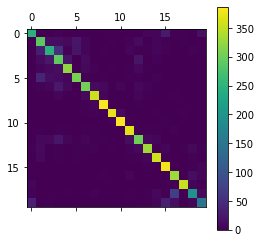

In [109]:
import matplotlib.pyplot as plt

# Confussion matrix
cm = metrics.confusion_matrix(test_target, predictions)
plt.matshow(cm)
plt.colorbar()

In [110]:
# Calculating the accuracy obtained from the model
print(metrics.classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       319
           1       0.69      0.75      0.72       389
           2       0.74      0.63      0.68       394
           3       0.65      0.75      0.69       392
           4       0.83      0.84      0.83       385
           5       0.84      0.78      0.81       395
           6       0.82      0.78      0.80       390
           7       0.89      0.90      0.90       396
           8       0.93      0.96      0.95       398
           9       0.95      0.94      0.95       397
          10       0.95      0.97      0.96       399
          11       0.89      0.93      0.91       396
          12       0.79      0.77      0.78       393
          13       0.89      0.84      0.86       396
          14       0.87      0.91      0.89       394
          15       0.82      0.95      0.88       398
          16       0.76      0.91      0.83       364
          17       0.97    

In [111]:
print(classifier.intercept_)
print(classifier.coef_)
print(classifier.coef_.shape)

[-3.16001007 -2.96389519 -2.95198016 -2.95367364 -2.97422231 -2.94860178
 -2.96218433 -2.94691686 -2.94020542 -2.94187906 -2.93686652 -2.94523477
 -2.95198016 -2.94691686 -2.94860178 -2.93853458 -3.0311772  -2.99874192
 -3.19175877 -3.40155099]
[[-10.90578286  -8.36353875 -13.30665276 ... -13.30665276 -13.30665276
  -13.30665276]
 [ -8.49255922  -9.25546691 -13.26023319 ... -13.26023319 -13.26023319
  -13.26023319]
 [ -8.64552244  -9.55007605 -13.31366805 ... -13.31366805 -13.31366805
  -13.31366805]
 ...
 [ -8.77873561  -7.38619498 -11.96408086 ... -13.49041923 -13.49041923
  -13.49041923]
 [ -9.09045794  -8.17247544 -13.32476    ... -13.32476    -13.32476
  -13.32476   ]
 [-10.23328697  -9.28562668 -13.12678656 ... -13.12678656 -13.12678656
  -13.12678656]]
(20, 130107)
